## 3.6. pseudotime explore gene weights

In this notebook we will explore the weights that were assigned to each gene in the transformation matrix W (see R script 3.1). In order to find matrx W, you need to run R script 3.1, or use the file `results/pseudotime/transformation_response_genes.csv` in the Github repository.


In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

### Load data

Here, we load the complete dataset (as filtered in notebook 1.3) and the transformation of each gene (matrix W).

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [4]:
### load transformation matrix W
transformation_path = "../results/pseudotime/transformation_response_genes.csv"
transformation = pd.read_csv(transformation_path, header=0, sep=",", index_col=0)

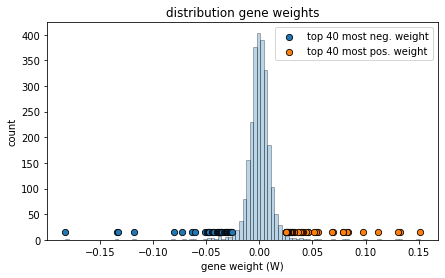

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(7, 4))
axs.hist(transformation, bins=100, zorder=0, edgecolor="black", alpha=0.3)
axs.scatter(transformation.sort_values(by="V1")[0:40], [15]*40, s=40, zorder=1, edgecolor="black", linewidth=0.8, label='top 40 most neg. weight')
axs.scatter(transformation.sort_values(by="V1", ascending=False)[0:40], [15]*40, s=40, zorder=2, edgecolor="black", linewidth=0.8, label='top 40 most pos. weight')
axs.set_title("distribution gene weights")
axs.set_ylabel("count")
axs.set_xlabel("gene weight (W)")
axs.legend(loc="upper right")

### save figure
save_path = "../figures/3.6.distribution_gene_weights.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

### Plot genes with highest weights
Here we will make dotplots with the genes with the most positive weights and the most negative weights.

In [6]:
W_genes_negative = transformation.sort_values(by="V1").index.values[0:40]

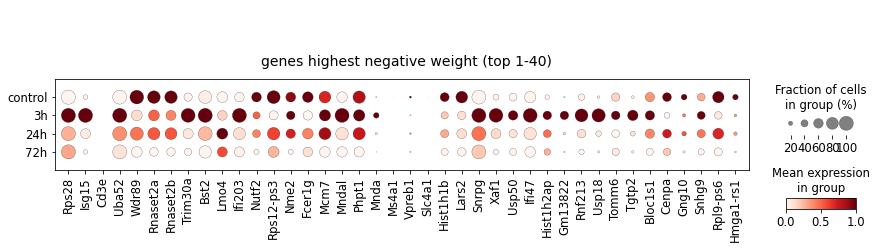

In [7]:
### plot top 40 negative weighted genes in dotplot
fig, axs = plt.subplots(1, 1, figsize=(14, 3))

SIZE = 14

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

sc.pl.dotplot(adata, W_genes_negative,
              groupby="time", standard_scale='var',
              title="",
              ax=axs, show=False)

axs.set_title('genes highest negative weight (top 1-40)', y=0.6, x=0.45)

# change position of legend
pos1_frac = fig.axes[3].get_position() # get the original position 
pos2_frac = [pos1_frac.x0 + 0.02, pos1_frac.y0 - 0.15, pos1_frac.width, pos1_frac.height]
fig.axes[3].set_position(pos2_frac) # set a new position

pos1_mean = fig.axes[4].get_position() # get the original position 
pos2_mean = [pos1_mean.x0 + 0.02, pos1_mean.y0 - 0.18, pos1_mean.width, pos1_mean.height]
fig.axes[4].set_position(pos2_mean) # set a new position

### save figure
save_path = "../figures/3.6.top40_genes_negative_weight.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

In [8]:
W_genes_positive = transformation.sort_values(by="V1", ascending=False).index.values[0:40]

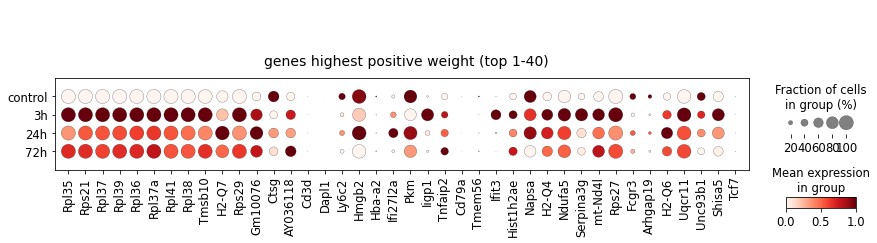

In [9]:
### plot top 40 positive weighted genes in dotplot
fig, axs = plt.subplots(1, 1, figsize=(14, 3))

SIZE = 14

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

sc.pl.dotplot(adata, W_genes_positive,
              groupby="time", standard_scale='var',
              title="",
              ax=axs, show=False)

axs.set_title('genes highest positive weight (top 1-40)', y=0.6, x=0.45)

# change position of legend
pos1_frac = fig.axes[3].get_position() # get the original position 
pos2_frac = [pos1_frac.x0 + 0.02, pos1_frac.y0 - 0.15, pos1_frac.width, pos1_frac.height]
fig.axes[3].set_position(pos2_frac) # set a new position

pos1_mean = fig.axes[4].get_position() # get the original position 
pos2_mean = [pos1_mean.x0 + 0.02, pos1_mean.y0 - 0.18, pos1_mean.width, pos1_mean.height]
fig.axes[4].set_position(pos2_mean) # set a new position

### save figure
save_path = "../figures/3.6.top40_genes_positive_weight.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)